Total conversations: 513
Unique topics: 22

Top 10 topics by frequency:
conversational commerce: 57
ongoing promotionsn: 40
product not listed: 38
product information: 38
payment: 33
still thinking / not sure yet: 32
follow-up after quote: 29
refund: 28
cancellation: 27
login issues: 26


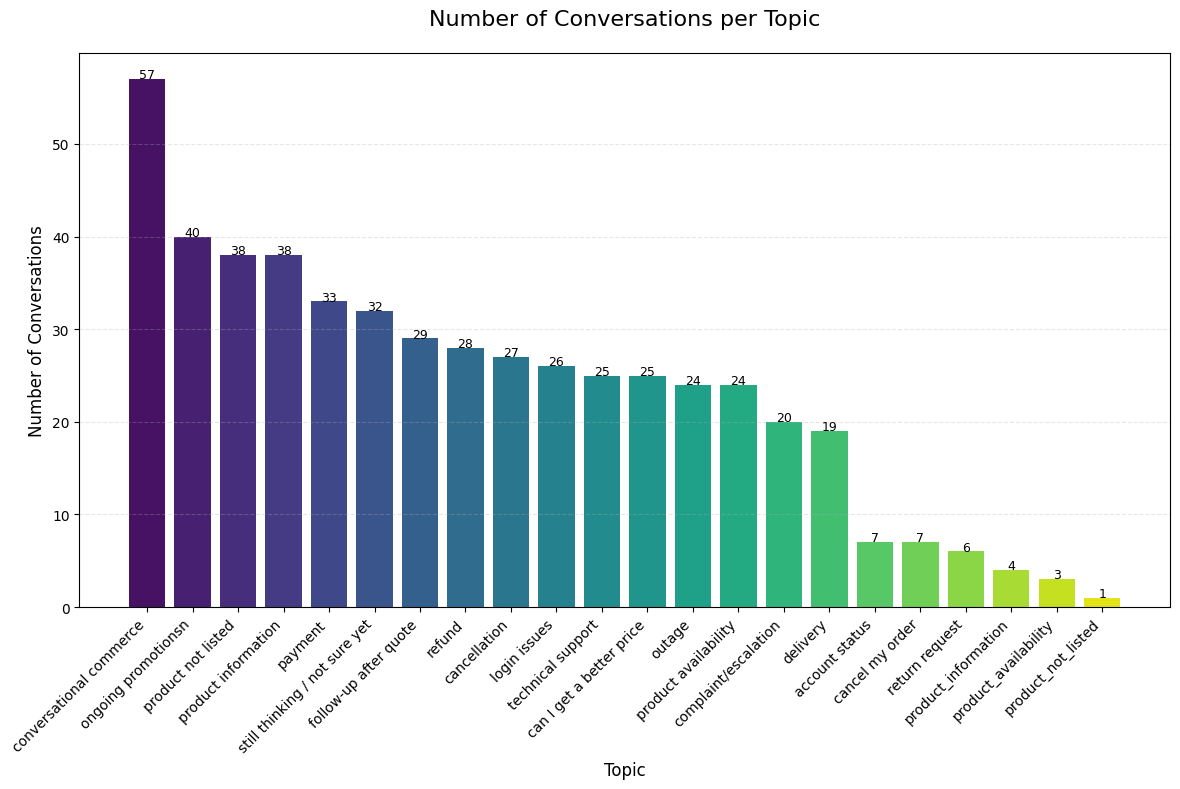

Visualization saved to topic_distribution.png


In [4]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from pathlib import Path

file_path = "gulf_chats_merged.json"
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

topics = [chat["chat_id"].rsplit("_", 1)[0].strip() for chat in data]
topic_counts = Counter(topics)

sorted_topics = dict(sorted(topic_counts.items(), key=lambda x: x[1], reverse=True))


print(f"Total conversations: {len(data)}")
print(f"Unique topics: {len(topic_counts)}")
print("\nTop 10 topics by frequency:")
for topic, count in list(sorted_topics.items())[:10]:
    print(f"{topic}: {count}")


plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", len(sorted_topics))


bars = plt.bar(sorted_topics.keys(), sorted_topics.values(), color=colors)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Number of Conversations per Topic", fontsize=16, pad=20)
plt.xlabel("Topic", fontsize=12)
plt.ylabel("Number of Conversations", fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)

output_path = Path("topic_distribution.png")
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Visualization saved to {output_path}")